# UEFA Champions League Finals' Shot Analysis (2010-2019)

![](https://tecnoblog.net/wp-content/uploads/2020/08/onde-assistir-a-final-champions-league-700x381.jpg)

##### Using data from [StatsBomb Open Data database](https://github.com/statsbomb/open-data)

### Setup

In [126]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [123]:
# These URLs are the locations where the raw StatsBomb data are located.
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
match_url = base_url + "events/{}.json"

The `parse_data` function handles the full Extract & Transform process.

ref [Devin Pleuler](https://colab.research.google.com/github/devinpleuler/analytics-handbook/blob/master/notebooks/data_extraction_and_transformation.ipynb)

In [3]:
def parse_data(competition_id, season_id):
    matches = requests.get(url=comp_url.format(competition_id, season_id)).json()
    match_ids = [m['match_id'] for m in matches]
    seasons = {m['match_id']:m["season"]["season_name"]for m in matches}

    all_events = []
    for match_id in tqdm(match_ids):

        events = requests.get(url=match_url.format(match_id)).json()

        shots = [x for x in events if x['type']['name'] == "Shot"]
        for s in shots:
            attributes = {
                "match_id": match_id,
                "season":seasons[match_id],
                "team": s["possession_team"]["name"],
                "player": s['player']['name'],
                "x": s['location'][0],
                "y": s['location'][1],
                "outcome": s['shot']['outcome']['name'],
                "xG": s['shot']["statsbomb_xg"]
            }
            all_events.append(attributes)
            
    return pd.DataFrame(all_events)

In [111]:
competition_id = 16 # Champions League StatsBomb Code
seasons_ids = [22, 23, 24, 25, 26, 27, 2,1, 4] # All Champions League's decade seasons codes

In [5]:
champions = None
for season in seasons_ids:
    if season == 22:
        champions = parse_data(16, season)
    else:
        champions = champions.append(parse_data(16, season))
    

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.83s/it]


### Overview

In [114]:
champions.head()

,match_id,season,team,player,x,y,outcome,xG
0,18236,2010/2011,Manchester United,Javier Hernández Balcázar,99.0,31.0,Blocked,0.032464
1,18236,2010/2011,Barcelona,David Villa Sánchez,99.0,39.0,Blocked,0.036887
2,18236,2010/2011,Barcelona,David Villa Sánchez,110.0,26.0,Blocked,0.043992
3,18236,2010/2011,Barcelona,Pedro Eliezer Rodríguez Ledesma,112.0,44.0,Off T,0.230775
4,18236,2010/2011,Barcelona,David Villa Sánchez,97.0,45.0,Off T,0.051712


In [113]:
champions.shape # Total number of shots and number of features, respectively.

(317, 8)

In [118]:
champions.team.unique() # All teams

array(['Manchester United', 'Barcelona', 'Bayern Munich', 'Chelsea',
       'Borussia Dortmund', 'Atlético Madrid', 'Real Madrid', 'Juventus',
       'Liverpool', 'Tottenham Hotspur'], dtype=object)

In [120]:
champions.outcome.unique() # All possible shot outcomes

array(['Blocked', 'Off T', 'Saved', 'Goal', 'Wayward', 'Post'],
      dtype=object)

### Shot Outcomes Analysis

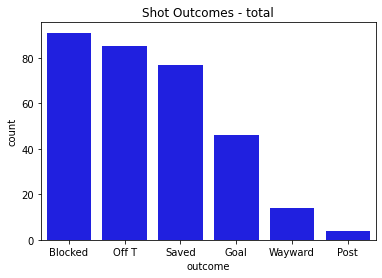

In [9]:
sns.countplot(champions.outcome, color='blue')
plt.title("Shot Outcomes - total");

We can that most shots in the Champions League finals' throught the decade ended up blocked, followed by shot off target and saved shots and, finally, as goals.

### Number of shots in Champions League finals per season

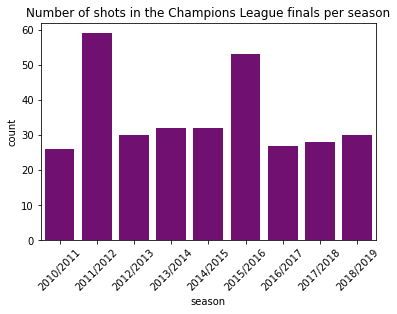

In [121]:
sns.countplot(champions.season, color='purple');
plt.title("Number of shots in the Champions League finals per season");
plt.xticks(rotation='45');

By the analysis of the total number of shots of the finals per season, we are able to note that the finals with most shots are the seasons 2011/2012 and 2015/2016, with more then 50 shots for each. This is especially justified because of the outstanding perfomance of two players: first, Arjen Robben, that in the 2011/2012 final fired 15 times at Chealsea's goal and, second, Gareth Bale, that shot 10 times at the goal in the 2015/2016 against Atletico de Madrid, as we see below.

### Players with most shots in the Champions League finals

Season:  2010/2011
Manchester United X Barcelona


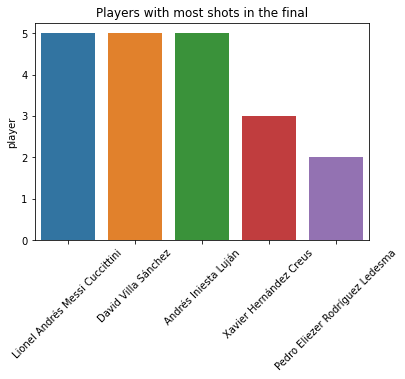



Season:  2011/2012
Bayern Munich X Chelsea


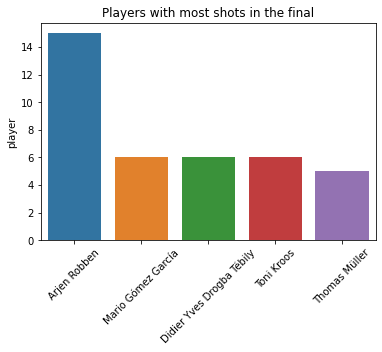



Season:  2012/2013
Borussia Dortmund X Bayern Munich


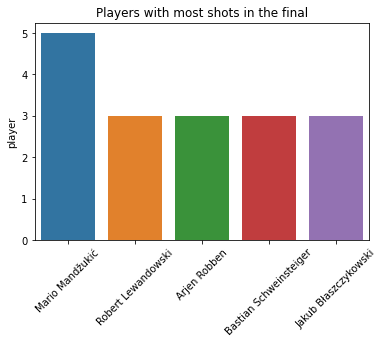



Season:  2013/2014
Atlético Madrid X Real Madrid


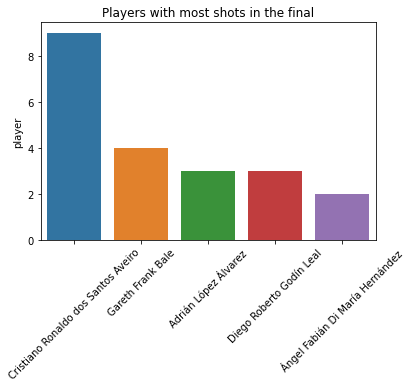



Season:  2014/2015
Juventus X Barcelona


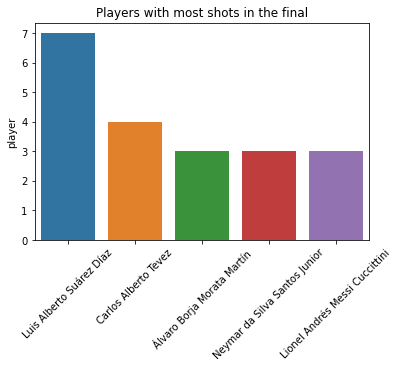



Season:  2015/2016
Atlético Madrid X Real Madrid


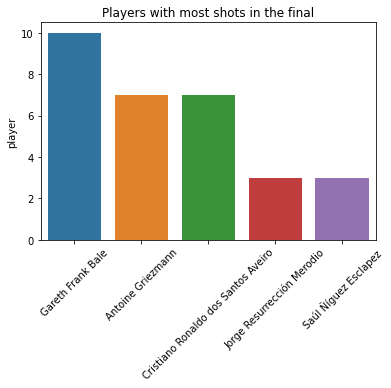



Season:  2016/2017
Juventus X Real Madrid


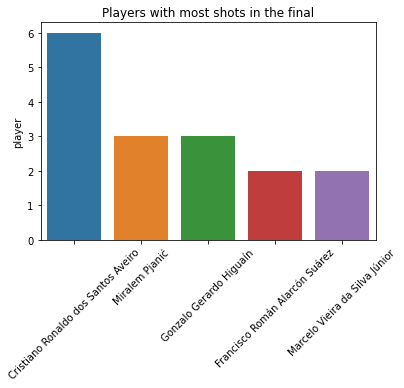



Season:  2017/2018
Liverpool X Real Madrid


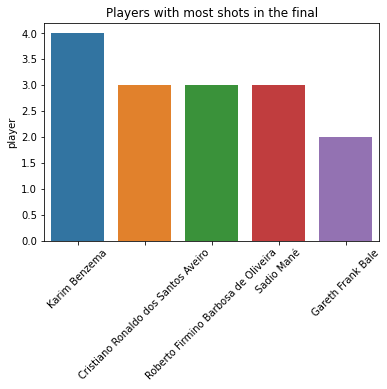



Season:  2018/2019
Liverpool X Tottenham Hotspur


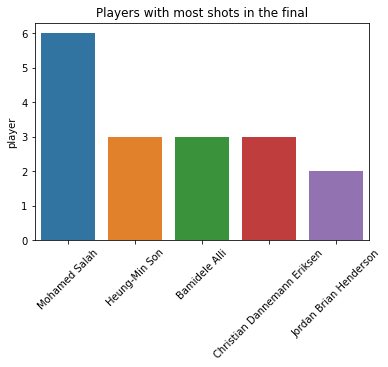

In [122]:
for season in champions['season'].unique():
    print('Season: ', season)
    print(champions.groupby('season')['team'].unique()[season][0], 'X',champions.groupby('season')['team'].unique()[season][1])
    plt.figure()
    sns.barplot(x=champions[champions.season==season]['player'].value_counts().index[:5],y=champions[champions.season==season]['player'].value_counts().head())
    plt.title('Players with most shots in the final')
    plt.xticks(rotation='45')
    plt.show()
    print('\n')

### Team X Team comparison 

In [65]:
champions.groupby('season')['team'].value_counts()

season     team             
2010/2011  Barcelona            22
           Manchester United     4
2011/2012  Bayern Munich        45
           Chelsea              14
2012/2013  Bayern Munich        17
           Borussia Dortmund    13
2013/2014  Real Madrid          19
           Atlético Madrid      13
2014/2015  Barcelona            17
           Juventus             15
2015/2016  Real Madrid          31
           Atlético Madrid      22
2016/2017  Real Madrid          18
           Juventus              9
2017/2018  Liverpool            14
           Real Madrid          14
2018/2019  Tottenham Hotspur    16
           Liverpool            14
Name: team, dtype: int64

Season:  2010/2011


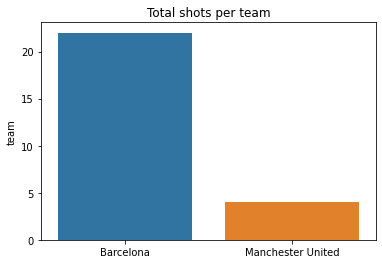

Season:  2011/2012


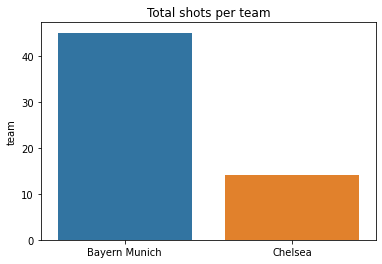

Season:  2012/2013


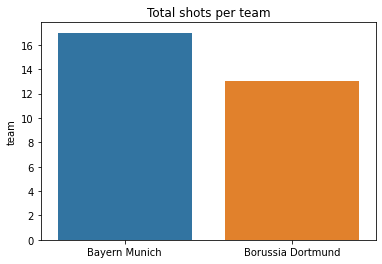

Season:  2013/2014


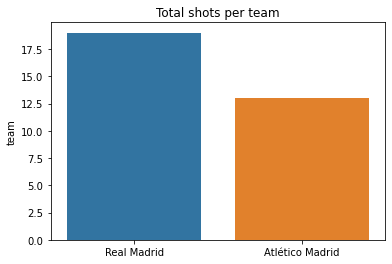

Season:  2014/2015


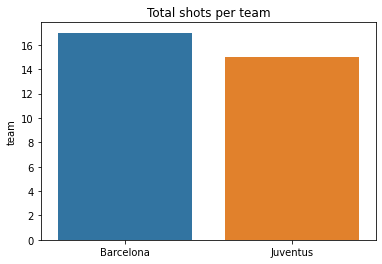

Season:  2015/2016


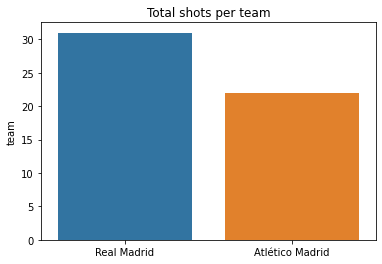

Season:  2016/2017


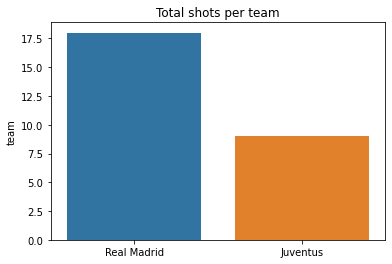

Season:  2017/2018


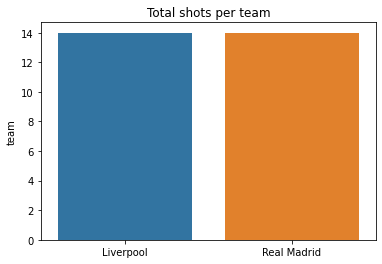

Season:  2018/2019


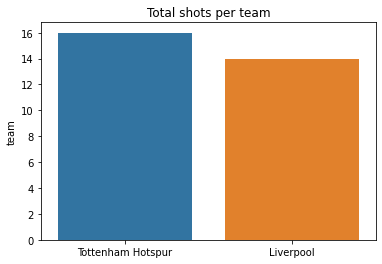

In [15]:
for season in champions.season.unique():
    print('Season: ', season)
    plt.figure()
    sns.barplot(x=champions[champions['season']==season]['team'].value_counts().index,y=champions[champions['season']==season]['team'].value_counts())
    plt.title('Total shots per team')
    plt.show()

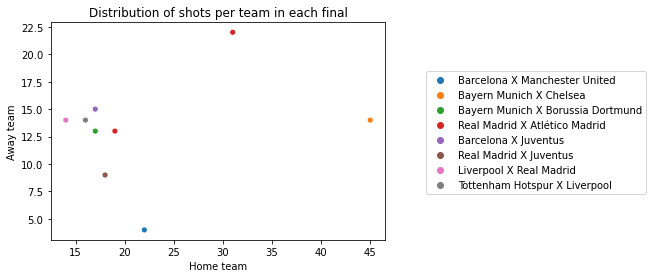

In [108]:
seasons = champions.season.unique()
x = []
y = []
finals = []
for season in seasons:
    total = champions.groupby('season')['team'].value_counts()[season]
    teams = champions.groupby('season')['team'].value_counts()[season].index
    x.append(total[0])
    y.append(total[1])
    finals.append(str(teams[0])+' X '+str(teams[1]))
sns.scatterplot(x=x,y=y,hue=finals);
plt.title('Distribution of shots per team in each final');
plt.ylabel('Away team');
plt.xlabel('Home team');
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8),ncol=1);

As we can see, from all finals, Bayern Munich is the club with most shots on goal (45) as Manchester United is finalist with the fewest shots in all seasons (4). As the scatterplot above shows, there is a pattern of shots conclusions in the Champions League final that goes around 15 to 20 shots for each team, what points the high perfomance of the european competition.

There are three outlier results in our analysis. Real Madrid X Atletico Madrid was the conflict that had a high number of conclusions for each team. Bayern Munich X Chealsea was the most unequal final as the german team had a very proeminent dominance even through it did not end up with the silverplate. Barcelona X Manchester United is included as an outlier because of the express low production of shots created by the english team.

### Expected Goals (xG) Analysis

Expected goals is a metric that aims to calculate how good it is a chance to score a goal. The metric varies from 0 to 1, where 0 is a shot with no chance of conversion and 1 is a certain goal. 

It is a perfomance indicator defined by different measurements, that vary from country to country and from league to league: distance from the goal, angle, shot condition (set piece or not, a header, strong or weak foot), etc.

[ref](https://mwfutebol.com.br/2019/11/08/o-que-e-expected-goals/)

### Top 10 xGs in the Champions League finals in the last decade (2010-2019)

In [110]:
champions[['season','player','team','outcome','xG']][champions['outcome']!='Goal'].sort_values(by='xG',ascending=False).head(10)

,season,player,team,outcome,xG
42,2011/2012,Arjen Robben,Bayern Munich,Saved,0.760000
57,2011/2012,Bastian Schweinsteiger,Bayern Munich,Saved,0.760000
55,2011/2012,Ivica Olić,Bayern Munich,Saved,0.760000
10,2015/2016,Antoine Griezmann,Atlético Madrid,Post,0.760000
50,2011/2012,Juan Manuel Mata García,Chelsea,Saved,0.760000
51,2015/2016,Juan Francisco Torres Belén,Atlético Madrid,Post,0.760000
46,2011/2012,Mario Gómez García,Bayern Munich,Blocked,0.498046
1,2015/2016,Karim Benzema,Real Madrid,Saved,0.414960
11,2010/2011,Lionel Andrés Messi Cuccittini,Barcelona,Off T,0.380880
26,2014/2015,Gerard Piqué Bernabéu,Barcelona,Off T,0.372257


This table clearly shows that the 2011/2012 Champions League final was the edition with most shots with high expected goals score in the all seasions, once it had half of the top 10 xGs in the analysis. 

As the competitiveness of the matches are quite high, this result is understandable because Bayern Munich had an elevate volume of created chances in the its battle against Chelsea. 

João Pedro Vazquez 2020

[Github](https://github.com/jpvazquezz)
[LinkedIn](https://www.linkedin.com/in/jo%C3%A3o-pedro-vazquez/)